<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Neural-Network-architrcture" data-toc-modified-id="Neural-Network-architrcture-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Neural Network architrcture</a></span></li><li><span><a href="#Initiation-of-neural-network-layers" data-toc-modified-id="Initiation-of-neural-network-layers-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Initiation of neural network layers</a></span></li><li><span><a href="#Initiation-of-parameter-values-for-each-layer" data-toc-modified-id="Initiation-of-parameter-values-for-each-layer-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Initiation of parameter values for each layer</a></span></li><li><span><a href="#Activation-functions" data-toc-modified-id="Activation-functions-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Activation functions</a></span></li><li><span><a href="#Forward-propagation" data-toc-modified-id="Forward-propagation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Forward propagation</a></span><ul class="toc-item"><li><span><a href="#Single-layer-forward-propagation-step" data-toc-modified-id="Single-layer-forward-propagation-step-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Single layer forward propagation step</a></span></li><li><span><a href="#Full-forward-propagation" data-toc-modified-id="Full-forward-propagation-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Full forward propagation</a></span></li></ul></li><li><span><a href="#Loss-Function" data-toc-modified-id="Loss-Function-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Loss Function</a></span></li><li><span><a href="#backward-propagation-step" data-toc-modified-id="backward-propagation-step-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>backward propagation step</a></span><ul class="toc-item"><li><span><a href="#Single-layer-backward-propagation-step¶" data-toc-modified-id="Single-layer-backward-propagation-step¶-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Single layer backward propagation step¶</a></span></li><li><span><a href="#full_backward_propagation" data-toc-modified-id="full_backward_propagation-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>full_backward_propagation</a></span></li><li><span><a href="#Updating-Params" data-toc-modified-id="Updating-Params-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Updating Params</a></span></li></ul></li><li><span><a href="#Putting-things-together" data-toc-modified-id="Putting-things-together-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Putting things together</a></span></li><li><span><a href="#Comparing-with-Keras" data-toc-modified-id="Comparing-with-Keras-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Comparing with Keras</a></span><ul class="toc-item"><li><span><a href="#Import" data-toc-modified-id="Import-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Import</a></span></li><li><span><a href="#Dataset" data-toc-modified-id="Dataset-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Dataset</a></span></li><li><span><a href="#Train" data-toc-modified-id="Train-9.3"><span class="toc-item-num">9.3&nbsp;&nbsp;</span>Train</a></span><ul class="toc-item"><li><span><a href="#Train-with-Keras" data-toc-modified-id="Train-with-Keras-9.3.1"><span class="toc-item-num">9.3.1&nbsp;&nbsp;</span>Train with Keras</a></span></li><li><span><a href="#Train-with-Models" data-toc-modified-id="Train-with-Models-9.3.2"><span class="toc-item-num">9.3.2&nbsp;&nbsp;</span>Train with Models</a></span></li></ul></li></ul></li><li><span><a href="#Visualisation-of-the-learning-process" data-toc-modified-id="Visualisation-of-the-learning-process-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Visualisation of the learning process</a></span><ul class="toc-item"><li><span><a href="#Keras" data-toc-modified-id="Keras-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>Keras</a></span></li><li><span><a href="#Numpy" data-toc-modified-id="Numpy-10.2"><span class="toc-item-num">10.2&nbsp;&nbsp;</span>Numpy</a></span></li></ul></li></ul></div>

# Neural Network architrcture

![](nn_arc.png)

In [1]:
import numpy as np

# Initiation of neural network layers

In [2]:
NN_ARCHITECTURE = [
    {"input_dim": 2, "output_dim": 25, "activation": "relu"},
    {"input_dim": 25, "output_dim": 50, "activation": "relu"},
    {"input_dim": 50, "output_dim": 50, "activation": "relu"},
    {"input_dim": 50, "output_dim": 25, "activation": "relu"},
    {"input_dim": 25, "output_dim": 1, "activation": "sigmoid"},
]

# Initiation of parameter values for each layer

![](paras.png)

In [3]:
def init_layers(nn_architecture, seed = 99):
    np.random.seed(seed)
    number_of_layers = len(nn_architecture)
    params_values = {}

    for idx, layer in enumerate(nn_architecture):
        # seasons = ['Spring', 'Summer', 'Fall', 'Winter']
        #>>> list(enumerate(seasons))
        #[(0, 'Spring'), (1, 'Summer'), (2, 'Fall'), (3, 'Winter')]
        layer_idx = idx + 1   # 层指数
        layer_input_size = layer["input_dim"]  # layer  对应 字典 （第几个字典）
        layer_output_size = layer["output_dim"]
        
        params_values['W' + str(layer_idx)] = np.random.randn(
            layer_output_size, layer_input_size) * 0.1  # 每层的W 标准正太分布  并使用小参数 有利于快速训练
        params_values['b' + str(layer_idx)] = np.random.randn(
            layer_output_size, 1) * 0.1
        
    return params_values

In [3]:
def init_layers(nn_architecture, seed = 99):
    # random seed initiation
    np.random.seed(seed)
    # number of layers in our neural network
    number_of_layers = len(nn_architecture)
    # parameters storage initiation
    params_values = {}
    
    # iteration over network layers
    for idx, layer in enumerate(nn_architecture):
        # we number network layers from 1
        layer_idx = idx + 1
        
        # extracting the number of units in layers
        layer_input_size = layer["input_dim"]
        layer_output_size = layer["output_dim"]
        
        # initiating the values of the W matrix
        # and vector b for subsequent layers
        params_values['W' + str(layer_idx)] = np.random.randn(
            layer_output_size, layer_input_size) * 0.1
        params_values['b' + str(layer_idx)] = np.random.randn(
            layer_output_size, 1) * 0.1
        
    return params_values

# Activation functions
* Without them, our neural network would become a combination of linear functions, so it would be just a linear function itself

In [4]:
def sigmoid(Z):
    return 1/(1+np.exp(-Z))

def relu(Z):
    return np.maximum(0,Z)

def sigmoid_backward(dA, Z):
    sig = sigmoid(Z)
    return dA * sig * (1 - sig)

def relu_backward(dA, Z):
    dZ = np.array(dA, copy = True)
    dZ[Z <= 0] = 0;
    return dZ;

# Forward propagation

## Single layer forward propagation step


In [5]:
def single_layer_forward_propagation(A_prev, W_curr, b_curr, activation="relu"):
    # calculation of the input value for the activation function
    Z_curr = np.dot(W_curr, A_prev) + b_curr
    
    # selection of activation function
    if activation is "relu":
        activation_func = relu
    elif activation is "sigmoid":
        activation_func = sigmoid
    else:
        raise Exception('Non-supported activation function')
        
    # return of calculated activation A and the intermediate Z matrix
    return activation_func(Z_curr), Z_curr

## Full forward propagation

In [22]:
def full_forward_propagation(X,params_values,nn_architecture):
    # 储存 反向传播 所需要的 参数
    memory= {}
    # 输入初始化
    A_curr = X
    
    for idx, layer in enumerate(nn_architecture):
        layer_idx = idx + 1   # 层数 从1 开始
        A_prev = A_curr     #  定义前一层的 activation
        
        activ_function_curr = layer["activation"]
        # 从 网络中提取 激活函数
        W_curr = params_values["W" + str(layer_idx)]
        #  c从创建的参数 字典中 提取 当前层的 参数初始值
        b_curr = params_values["b" + str(layer_idx)]
        # 计算 当前层的激活： 前一层的 激活值 ， 当前层的参数，当前层的激活函数
        A_curr, Z_curr = single_layer_forward_propagation(A_prev, W_curr, b_curr, activ_function_curr)
        
        # 在字典中 保存 前一层的激活 和当前层的 Z = W * A + B
        memory["A"+ str(idx)] = A_prev
        memory["Z"+ str(layer_idx)] = Z_curr
    
    return A_curr, memory

In [6]:
def full_forward_propagation(X, params_values, nn_architecture):
    # creating a temporary memory to store the information needed for a backward step
    memory = {}
    # X vector is the activation for layer 0 
    A_curr = X
    
    # iteration over network layers
    for idx, layer in enumerate(nn_architecture):
        # we number network layers from 1
        layer_idx = idx + 1
        # transfer the activation from the previous iteration
        A_prev = A_curr
        
        # extraction of the activation function for the current layer
        activ_function_curr = layer["activation"]
        # extraction of W for the current layer
        W_curr = params_values["W" + str(layer_idx)]
        # extraction of b for the current layer
        b_curr = params_values["b" + str(layer_idx)]
        # calculation of activation for the current layer
        A_curr, Z_curr = single_layer_forward_propagation(A_prev, W_curr, b_curr, activ_function_curr)
        
        # saving calculated values in the memory
        memory["A" + str(idx)] = A_prev
        memory["Z" + str(layer_idx)] = Z_curr
       
    # return of prediction vector and a dictionary containing intermediate values
    return A_curr, memory

# Loss Function
* Generally speaking, the loss function is designed to show how far we are from the ‘ideal’ solution

In [7]:
def get_cost_value(Y_hat, Y):
    m = Y_hat.shape[1]
    cost = -1 / m * (np.dot(Y, np.log(Y_hat).T) + np.dot(1 - Y, np.log(1 - Y_hat).T))
    return np.squeeze(cost)
    #  Squeeze : Remove single-dimensional entries from the shape of an array.  
    #  重构数组形状

    # an auxiliary function that converts probability into class
def convert_prob_into_class(probs):
    # 转换成 1，0 的矩阵
    probs_ = np.copy(probs)
    probs_[probs_ > 0.5] = 1
    probs_[probs_ <= 0.5] = 0
    return probs_

def get_accuracy_value(Y_hat, Y):
    Y_hat_ = convert_prob_into_class(Y_hat)
    return (Y_hat_ == Y).all(axis=0).mean()
    # all 统计计数 

#  backward propagation step

##  Single layer backward propagation step¶

In [8]:
def single_layer_backward_propagation(dA_curr,
                                      W_curr,
                                      b_curr,
                                      Z_curr,
                                      A_prev,
                                      activation="relu"):
    # number of examples
    m = A_prev.shape[1]

    # selection of activation function
    if activation is "relu":
        backward_activation_func = relu_backward
    elif activation is "sigmoid":
        backward_activation_func = sigmoid_backward
    else:
        raise Exception('Non-supported activation function')

    # calculation of the activation function derivative
    dZ_curr = backward_activation_func(dA_curr, Z_curr)

    # derivative of the matrix W
    dW_curr = np.dot(dZ_curr, A_prev.T) / m
    # derivative of the vector b
    db_curr = np.sum(dZ_curr, axis=1, keepdims=True) / m
    # derivative of the matrix A_prev
    dA_prev = np.dot(W_curr.T, dZ_curr)

    return dA_prev, dW_curr, db_curr

## full_backward_propagation

In [9]:
def full_backward_propagation(Y_hat, Y, memory, params_values,
                              nn_architecture):
    grads_values = {}

    # number of examples
    m = Y.shape[1]
    # a hack ensuring the same shape of the prediction vector and labels vector
    Y = Y.reshape(Y_hat.shape)

    # initiation of gradient descent algorithm
    dA_prev = -(np.divide(Y, Y_hat) - np.divide(1 - Y, 1 - Y_hat))

    for layer_idx_prev, layer in reversed(list(enumerate(nn_architecture))):
        # we number network layers from 1
        layer_idx_curr = layer_idx_prev + 1
        # extraction of the activation function for the current layer
        activ_function_curr = layer["activation"]

        dA_curr = dA_prev

        A_prev = memory["A" + str(layer_idx_prev)]
        Z_curr = memory["Z" + str(layer_idx_curr)]

        W_curr = params_values["W" + str(layer_idx_curr)]
        b_curr = params_values["b" + str(layer_idx_curr)]

        dA_prev, dW_curr, db_curr = single_layer_backward_propagation(
            dA_curr, W_curr, b_curr, Z_curr, A_prev, activ_function_curr)

        grads_values["dW" + str(layer_idx_curr)] = dW_curr
        grads_values["db" + str(layer_idx_curr)] = db_curr

    return grads_values

In [9]:
def full_backward_propagation(Y_hat, Y, memory, params_values, nn_architecture):
    grads_values = {}
    
    # number of examples
    m = Y.shape[1]
    # a hack ensuring the same shape of the prediction vector and labels vector
    Y = Y.reshape(Y_hat.shape)
    
    # initiation of gradient descent algorithm
    dA_prev = - (np.divide(Y, Y_hat) - np.divide(1 - Y, 1 - Y_hat));
    
    for layer_idx_prev, layer in reversed(list(enumerate(nn_architecture))):
        # we number network layers from 1
        layer_idx_curr = layer_idx_prev + 1
        # extraction of the activation function for the current layer
        activ_function_curr = layer["activation"]
        
        dA_curr = dA_prev
        
        A_prev = memory["A" + str(layer_idx_prev)]
        Z_curr = memory["Z" + str(layer_idx_curr)]
        
        W_curr = params_values["W" + str(layer_idx_curr)]
        b_curr = params_values["b" + str(layer_idx_curr)]
        
        dA_prev, dW_curr, db_curr = single_layer_backward_propagation(
            dA_curr, W_curr, b_curr, Z_curr, A_prev, activ_function_curr)
        
        grads_values["dW" + str(layer_idx_curr)] = dW_curr
        grads_values["db" + str(layer_idx_curr)] = db_curr
    
    return grads_values

##  Updating Params

In [10]:
def update(params_values, grads_values, nn_architecture, learning_rate):
    # 更新参数
    for layer_idx, layer in enumerate(nn_architecture):
        params_values["W" + str(layer_idx)] -= learning_rate * grads_values["dW" + str(layer_idx)]        
        params_values["b" + str(layer_idx)] -= learning_rate * grads_values["db" + str(layer_idx)]

    return params_values;

In [10]:
def update(params_values, grads_values, nn_architecture, learning_rate):

    # iteration over network layers
    for layer_idx, layer in enumerate(nn_architecture, 1):
        params_values["W" + str(layer_idx)] -= learning_rate * grads_values["dW" + str(layer_idx)]        
        params_values["b" + str(layer_idx)] -= learning_rate * grads_values["db" + str(layer_idx)]

    return params_values;

# Putting things together

In [11]:
def train(X, Y,nn_architecture,epochs, learning_rate,verbose=False,callback = None):
    params_values = init_layers(nn_architecture,2)
    cost_history = []
    accuracy_history = []
    
    for i in range(epochs):
        # 前置传播 计算
        Y_hat, cashe = full_forward_propagation(X,params_values,nn_architecture)
        
        # 计算损失值和精确度
        cost = get_cost_value(Y_hat, Y)
        cost_history.append(cost)
        accuracy = get_accuracy_value(Y_hat, Y)
        accuracy_history.append(accuracy)
        
        # 反向传播，计算下降梯度
        grads_values = full_backward_propagation(Y_hat, Y, cashe, params_values, nn_architecture)
        # updating model state
        params_values = update(params_values, grads_values, nn_architecture, learning_rate)
        
        if(i % 50 == 0):
            if(verbose):
                # 打印进度条
                print("Iteration: {:05} - cost: {:.5f} - accuracy: {:.5f}".format(i, cost, accuracy))
            if(callback is not None):
                callback(i, params_values)
        
    return params_values
    

In [11]:
def train(X, Y, nn_architecture, epochs, learning_rate, verbose=False, callback=None):
    # initiation of neural net parameters
    params_values = init_layers(nn_architecture, 2)
    # initiation of lists storing the history 
    # of metrics calculated during the learning process 
    cost_history = []
    accuracy_history = []
    
    # performing calculations for subsequent iterations
    for i in range(epochs):
        # step forward
        Y_hat, cashe = full_forward_propagation(X, params_values, nn_architecture)
        
        # calculating metrics and saving them in history
        cost = get_cost_value(Y_hat, Y)
        cost_history.append(cost)
        accuracy = get_accuracy_value(Y_hat, Y)
        accuracy_history.append(accuracy)
        
        # step backward - calculating gradient
        grads_values = full_backward_propagation(Y_hat, Y, cashe, params_values, nn_architecture)
        # updating model state
        params_values = update(params_values, grads_values, nn_architecture, learning_rate)
        
        if(i % 50 == 0):
            if(verbose):
                print("Iteration: {:05} - cost: {:.5f} - accuracy: {:.5f}".format(i, cost, accuracy))
            if(callback is not None):
                callback(i, params_values)
            
    return params_values

# Comparing with Keras

## Import

In [12]:
import os
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
sns.set_style("whitegrid")

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras import regularizers

from sklearn.metrics import accuracy_score

Using TensorFlow backend.


In [13]:
# number of samples in the data set
N_SAMPLES = 1000
# ratio between training and test sets
TEST_SIZE = 0.1

## Dataset

In [14]:
X, y = make_moons(n_samples = N_SAMPLES, noise=0.2, random_state=100)
# 产生 半圆型 的数据
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=42)

In [15]:
# the function making up the graph of a dataset
def make_plot(X, y, plot_name, file_name=None, XX=None, YY=None, preds=None, dark=False):
    if (dark):
        plt.style.use('dark_background')
    else:
        sns.set_style("whitegrid")
    plt.figure(figsize=(16,12))
    axes = plt.gca()
    axes.set(xlabel="$X_1$", ylabel="$X_2$")
    plt.title(plot_name, fontsize=30)
    plt.subplots_adjust(left=0.20)
    plt.subplots_adjust(right=0.80)
    if(XX is not None and YY is not None and preds is not None):
        plt.contourf(XX, YY, preds.reshape(XX.shape), 25, alpha = 1, cmap=cm.Spectral)
        plt.contour(XX, YY, preds.reshape(XX.shape), levels=[.5], cmap="Greys", vmin=0, vmax=.6)
    plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), s=40, cmap=plt.cm.Spectral, edgecolors='black')
    if(file_name):
        plt.savefig(file_name)
        plt.close()

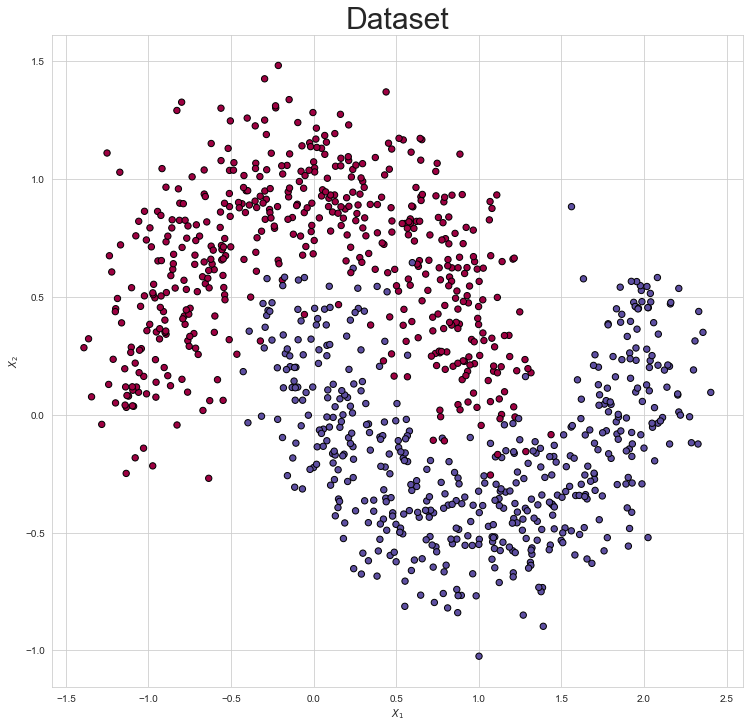

In [16]:
make_plot(X, y, "Dataset")

## Train

### Train with Keras

In [17]:
# Building a model
model = Sequential()
model.add(Dense(25, input_dim=2,activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

# Training
history = model.fit(X_train, y_train, epochs=200, verbose=0)

In [18]:
Y_test_hat = model.predict_classes(X_test)
acc_test = accuracy_score(y_test, Y_test_hat)
print("Test set accuracy: {:.2f} ".format(acc_test))

Test set accuracy: 0.99 


### Train with Models 

In [19]:
# Training
params_values = train(np.transpose(X_train), np.transpose(y_train.reshape((y_train.shape[0], 1))), NN_ARCHITECTURE, 10000, 0.01)

# Prediction
Y_test_hat, _ = full_forward_propagation(np.transpose(X_test), params_values, NN_ARCHITECTURE)


In [20]:
# Accuracy achieved on the test set
acc_test = get_accuracy_value(Y_test_hat, np.transpose(y_test.reshape((y_test.shape[0], 1))))
print("Test set accuracy: {:.2f} ".format(acc_test))

Test set accuracy: 0.98 


# Visualisation of the learning process

## Keras

In [21]:
# boundary of the graph
GRID_X_START = -1.5
GRID_X_END = 2.5
GRID_Y_START = -1.0
GRID_Y_END = 2
# output directory (the folder must be created on the drive)
OUTPUT_DIR = "./binary_classification_vizualizations/"

grid = np.mgrid[GRID_X_START:GRID_X_END:100j,GRID_X_START:GRID_Y_END:100j]
grid_2d = grid.reshape(2, -1).T
XX, YY = grid

In [22]:
def callback_keras_plot(epoch, logs):
    plot_title = "Keras Model - It: {:05}".format(epoch)
    file_name = "keras_model2_{:05}.png".format(epoch)
    file_path = os.path.join(OUTPUT_DIR, file_name)
    prediction_probs = model.predict_proba(grid_2d, batch_size=32, verbose=0)
    make_plot(X_test, y_test, plot_title, file_name=file_path, XX=XX, YY=YY, preds=prediction_probs)
    


In [23]:
# Adding callback functions that they will run in every epoch
testmodelcb = keras.callbacks.LambdaCallback(on_epoch_end=callback_keras_plot)

In [24]:
# Building a model
model = Sequential()
model.add(Dense(25, input_dim=2,activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

# Training
history = model.fit(X_train, y_train, epochs=200, verbose=0, callbacks=[testmodelcb])

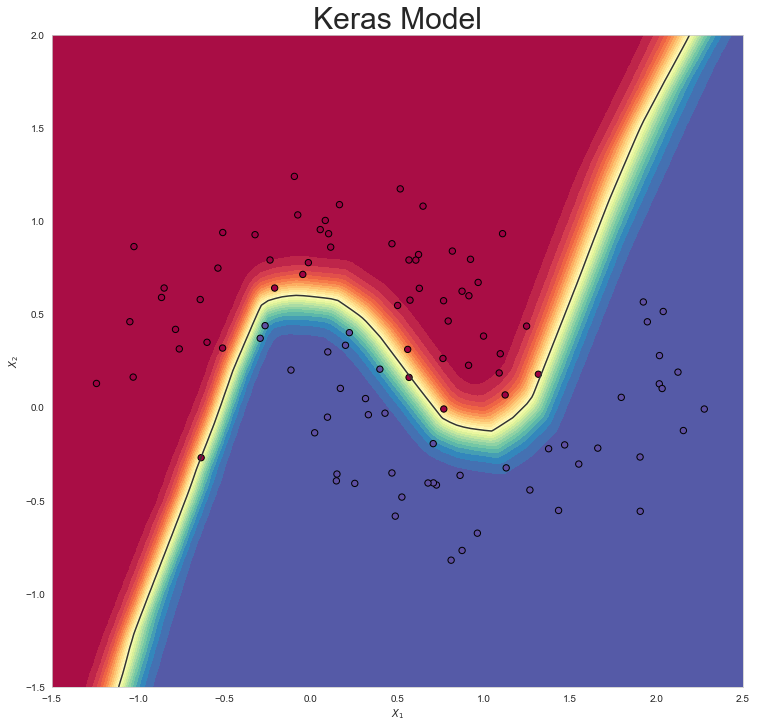

In [25]:
prediction_probs = model.predict_proba(grid_2d, batch_size=32, verbose=0)
make_plot(X_test, y_test, "Keras Model", file_name=None, XX=XX, YY=YY, preds=prediction_probs)

![](keras_modle.gif)

## Numpy

In [26]:
def callback_numpy_plot(index, params):
    plot_title = "NumPy Model - It: {:05}".format(index)
    file_name = "numpy_model2_{:05}.png".format(index//50)
    file_path = os.path.join(OUTPUT_DIR, file_name)
    prediction_probs, _ = full_forward_propagation(np.transpose(grid_2d), params, NN_ARCHITECTURE)
    prediction_probs = prediction_probs.reshape(prediction_probs.shape[1], 1)
    make_plot(X_test, y_test, plot_title, file_name=file_path, XX=XX, YY=YY, preds=prediction_probs, dark=True)

In [27]:
# Training
params_values = train(np.transpose(X_train), np.transpose(y_train.reshape((y_train.shape[0], 1))), NN_ARCHITECTURE, 10000, 0.01, False, callback_numpy_plot)

/Users/liuchuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/matplotlib/contour.py:1230: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


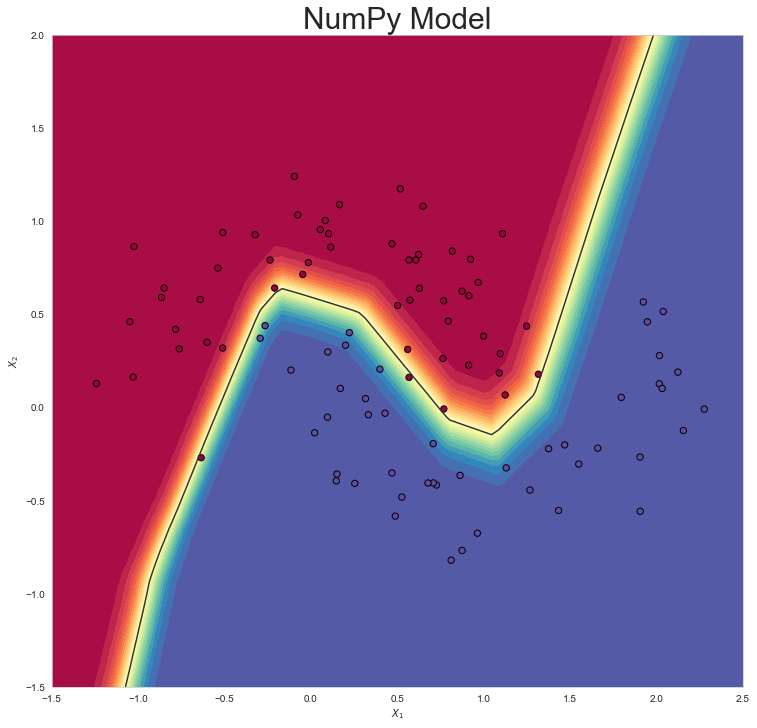

In [28]:
prediction_probs_numpy, _ = full_forward_propagation(np.transpose(grid_2d), params_values, NN_ARCHITECTURE)
prediction_probs_numpy = prediction_probs_numpy.reshape(prediction_probs_numpy.shape[1], 1)
make_plot(X_test, y_test, "NumPy Model", file_name=None, XX=XX, YY=YY, preds=prediction_probs_numpy)


![](numpy_modle.gif)